In [48]:
import pandas as pd
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set()

In [3]:
data = pd.read_excel('body_image.xls')
data.head(10)

,Gender,Height,GPA,HS GPA,Seat,WtFeel,Cheat
0,Female,64.0,2.6,2.63,M,AboutRt,No
1,Male,69.0,2.7,3.72,M,AboutRt,No
2,Female,66.0,3,3.44,F,AboutRt,No
3,Female,63.0,3.11,2.73,F,AboutRt,No
4,Male,72.0,3.4,2.35,B,OverWt,No
5,Female,67.0,3.43,3.84,M,AboutRt,No
6,Male,69.0,3.7,4,F,NaN,No
7,Male,74.0,3.7,3.92,B,AboutRt,No
8,Male,72.0,3.77,3.09,M,UnderWt,No
9,Female,63.0,3.5,4,F,AboutRt,No


In [40]:
data.dtypes

Gender     object
Height    float64
GPA        object
HS GPA     object
Seat       object
WtFeel     object
Cheat      object
dtype: object

### Out of the first 10 how many sit at the back?

In [7]:
data[:10][data.Seat[:10] == 'B']

,Gender,Height,GPA,HS GPA,Seat,WtFeel,Cheat
4,Male,72.0,3.4,2.35,B,OverWt,No
7,Male,74.0,3.7,3.92,B,AboutRt,No


### Out of the first 10 how many have a college GPA higher than highschool GPA?

In [13]:
higher_college_gpa = data['GPA'][:10] > data['HS GPA'][:10]
data[:10][higher_college_gpa]

,Gender,Height,GPA,HS GPA,Seat,WtFeel,Cheat
3,Female,63.0,3.11,2.73,F,AboutRt,No
4,Male,72.0,3.4,2.35,B,OverWt,No
8,Male,72.0,3.77,3.09,M,UnderWt,No


### What is the tipical seat of the student with highest GPA?

In [37]:
max_gpa = data[:10].GPA.max()
data[:10][data[:10].GPA == max_gpa]

,Gender,Height,GPA,HS GPA,Seat,WtFeel,Cheat
8,Male,72.0,3.77,3.09,M,UnderWt,No


### Is there a relationship between students' college GPAs and their high school GPAs?

#### Transform GPA scores to numeric

In [46]:
data['HS GPA'] = pd.to_numeric(data['HS GPA'], errors='coerce')
data['GPA'] = pd.to_numeric(data.GPA, errors='coerce')
data.dtypes

Gender     object
Height    float64
GPA       float64
HS GPA    float64
Seat       object
WtFeel     object
Cheat      object
dtype: object

#### Scatterplot

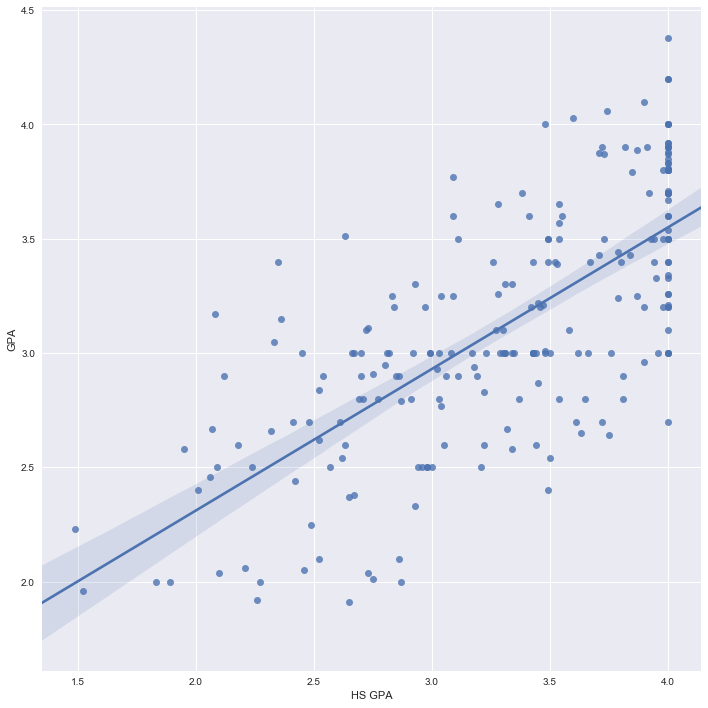

In [50]:
sns.lmplot(x='HS GPA', y='GPA', data=data, fit_reg=True, size=10)

In [51]:
data.loc[:, ['HS GPA', 'GPA']].corr()

,HS GPA,GPA
HS GPA,1.000000,0.715547
GPA,0.715547,1.000000


#### Regression line equation

In [62]:
np.polyfit(data['HS GPA'].dropna(), data['GPA'].dropna(), deg=1)

array([0.61922928, 1.07274462])

GPA = 1.07 + 0.62(HS_GPA)

Analysis of the relationship between high school GPA and college GPA, shows that in general students with higher GPA scores in high school have higher GPA scores in college, a moderately strong positive relationship with correlation of 0.72 shows the trend. The data does not appear to contain any outliers.

The results can be used to guide students that show difficulties during high school, and measure changes in teaching methods.

### Are there differences between males and females with respect to body image?

In [87]:
dummies = pd.get_dummies(data.loc[:, ['WtFeel']], prefix='', prefix_sep='')

In [98]:
mf_bodyweight = pd.concat([data.Gender, dummies], axis=1)
table = mf_bodyweight.groupby('Gender').sum()
table

,AboutRt,OverWt,UnderWt
Gender,,,
Female,107,32,6
Male,56,15,13


In [99]:
table['total'] = table.sum(axis=1)

In [100]:
table

,AboutRt,OverWt,UnderWt,total
Gender,,,,
Female,107,32,6,145
Male,56,15,13,84


#### Conditional percentages

In [101]:
table.apply(lambda x: x/x.total, axis=1)

,AboutRt,OverWt,UnderWt,total
Gender,,,,
Female,0.737931,0.220690,0.041379,1.0
Male,0.666667,0.178571,0.154762,1.0


In general women tend to feel good about their body image more than men, 74% vs 67% respectively. 22% of females feel overweight and only 4% feel underweight, vs males of which 18% feel overweight and 15% feel underweight. The most striking defference is that women not happy with their image usually feels overweight, where for men there's not such a big difference in numbers between the ones that feel overweight vs underweight. The data also shows that in general women feels jus right more often than men.

People that doesnt feel good about themselves might have difficulty in other areas of life, like studying, this information can be taken into account when evaluating other attributes of the dataset.

### Is students' academic performance in college related to their typical seating location in class?

In [102]:
position_gpa = data.loc[:, ['GPA', 'Seat']]
position_gpa.head()

,GPA,Seat
0,2.60,M
1,2.70,M
2,3.00,F
3,3.11,F
4,3.40,B


In [147]:
gpa = position_gpa.pivot(columns='Seat').GPA
gpa.head()

Seat,B,F,M
0,NaN,NaN,2.6
1,NaN,NaN,2.7
2,NaN,3.00,NaN
3,NaN,3.11,NaN
4,3.4,NaN,NaN


In [148]:
gpab = gpa.B.dropna().reset_index(drop=True)
gpaf = gpa.F.dropna().reset_index(drop=True)
gpam = gpa.M.dropna().reset_index(drop=True)
gpa = pd.concat([gpab, gpaf, gpam], axis=1)
gpa.head()

,B,F,M
0,3.4,3.00,2.60
1,3.7,3.11,2.70
2,3.0,3.70,3.43
3,3.2,3.50,3.77
4,3.0,3.00,3.00


In [149]:
gpa.describe()

,B,F,M
count,46.000000,51.000000,131.000000
mean,2.974348,3.251098,3.118931
std,0.493296,0.567237,0.526408
min,2.000000,1.920000,1.910000
25%,2.677500,3.000000,2.780000
50%,3.000000,3.330000,3.000000
75%,3.237500,3.700000,3.505000
max,4.060000,4.100000,4.380000


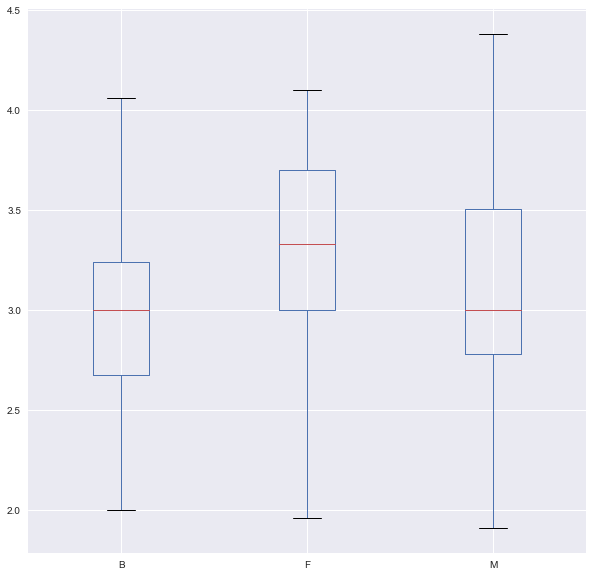

In [150]:
gpa.plot(kind='box', figsize=(10, 10))

The sitting position seem to affect the academic performance of students, as the graph shows the closer to the front the student sit the higher the GPA, with median of 3.3 for students that sit at the front, and 3 for sudents that sit at the middle and back.

The distribution shows that the top 75% of students that sit at the front have better GPA scores than the bottom 50% of sudents that sit in the middle and at the back. Sudents that sit in the middle shows the highest range of GPA score of 2.47.

In general students that sit at the front seem to have higher GPAs scores. That might be because better students sit at the front by preference, or because sitting at the front is easier to concentrate.

The data shows that there's some relationship between sitting position and GPA scores, but the relationship is not reliable because the range in the three groups is very high, 1.9 for students sitting at the back, 2.18 for front sitters and 2.47 for back sitters.
This information can be used to encourage students not doing very well to sit at closer to the front, that might help the student to improve performance

### Summary

High school GPAs scores might help guide student having difficulties before they get to college.

Females tend to feel more confident about their body image than men, but when they don't, often they feel they are overweight, in contrast to man that feel overweight and underweight in roughly the same proportion.

Sitting closer to the front in class might help boost performance, if sudents are having bad performance they can be encouraged to sit closer to the front in classes.